In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('training_mathbert1.xlsx')
df.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_375,embed_376,embed_377,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383,output
0,-0.089926,0.343874,0.176382,0.169358,-0.413337,-0.276315,0.188070,0.094621,0.330203,-0.258730,...,-0.272278,-0.230662,0.173143,-0.259786,-0.316996,-0.389919,0.105596,0.196438,0.117199,0.0
1,0.303261,0.084930,0.047369,-0.017244,-0.524733,-0.104934,0.335107,-0.081476,0.213762,-0.105293,...,-0.310262,-0.090271,0.129022,-0.008138,-0.220774,-0.021343,-0.029695,0.335977,-0.197539,0.0
2,-0.274291,0.216801,0.029110,0.259279,-0.655594,-0.289643,0.073369,0.014463,0.104336,-0.014190,...,-0.464926,-0.117493,-0.118993,-0.046860,0.010008,-0.118400,-0.085768,0.512956,0.023334,0.0
3,0.118676,0.095572,0.157358,0.225097,-0.632885,-0.125629,0.204013,0.074028,0.149310,-0.147779,...,-0.030543,-0.100965,0.236099,-0.286450,-0.130198,-0.051258,-0.047492,0.241473,-0.095162,0.0
4,0.298772,0.300674,0.366119,-0.022142,-0.748852,-0.035268,0.277504,0.075697,0.055439,-0.200804,...,-0.149575,-0.230057,0.296528,-0.526185,-0.251471,0.196795,-0.101786,0.570922,0.007743,0.0


In [6]:
def check(x):
    if x < 0 or x > 4:
        return 0
    else:
        return 1
df['output'].apply(check)


0       1
1       1
2       1
3       1
4       1
       ..
1121    0
1122    0
1123    0
1124    0
1125    0
Name: output, Length: 1126, dtype: int64

In [70]:
output_1_df = df[df['output'] == 1]
output_0_df = df[df['output'] != 1]
x=output_1_df.mean()
y=output_0_df.mean()
x

embed_0     -0.184075
embed_1      0.137983
embed_2      0.104661
embed_3      0.127538
embed_4     -0.408991
               ...   
embed_380   -0.141090
embed_381    0.004908
embed_382    0.271903
embed_383   -0.027964
output       1.000000
Length: 385, dtype: float64

In [54]:
output_1_df.std(axis=1)
output_0_df.std(axis=1)


0       0.238252
1       0.221066
2       0.232740
3       0.220679
4       0.271610
          ...   
1121    0.367773
1122    0.373164
1123    0.367157
1124    0.370692
1125    0.365675
Length: 1087, dtype: float64

In [55]:

wednesday_prices=df[df["output"]==0]
np.mean(wednesday_prices).sum()

c:\Users\naman\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


-1.1920274029516795

In [57]:
distance = np.linalg.norm(x-y)
distance

2.3620816130898366

<Axes: xlabel='embed_0', ylabel='embed_1'>

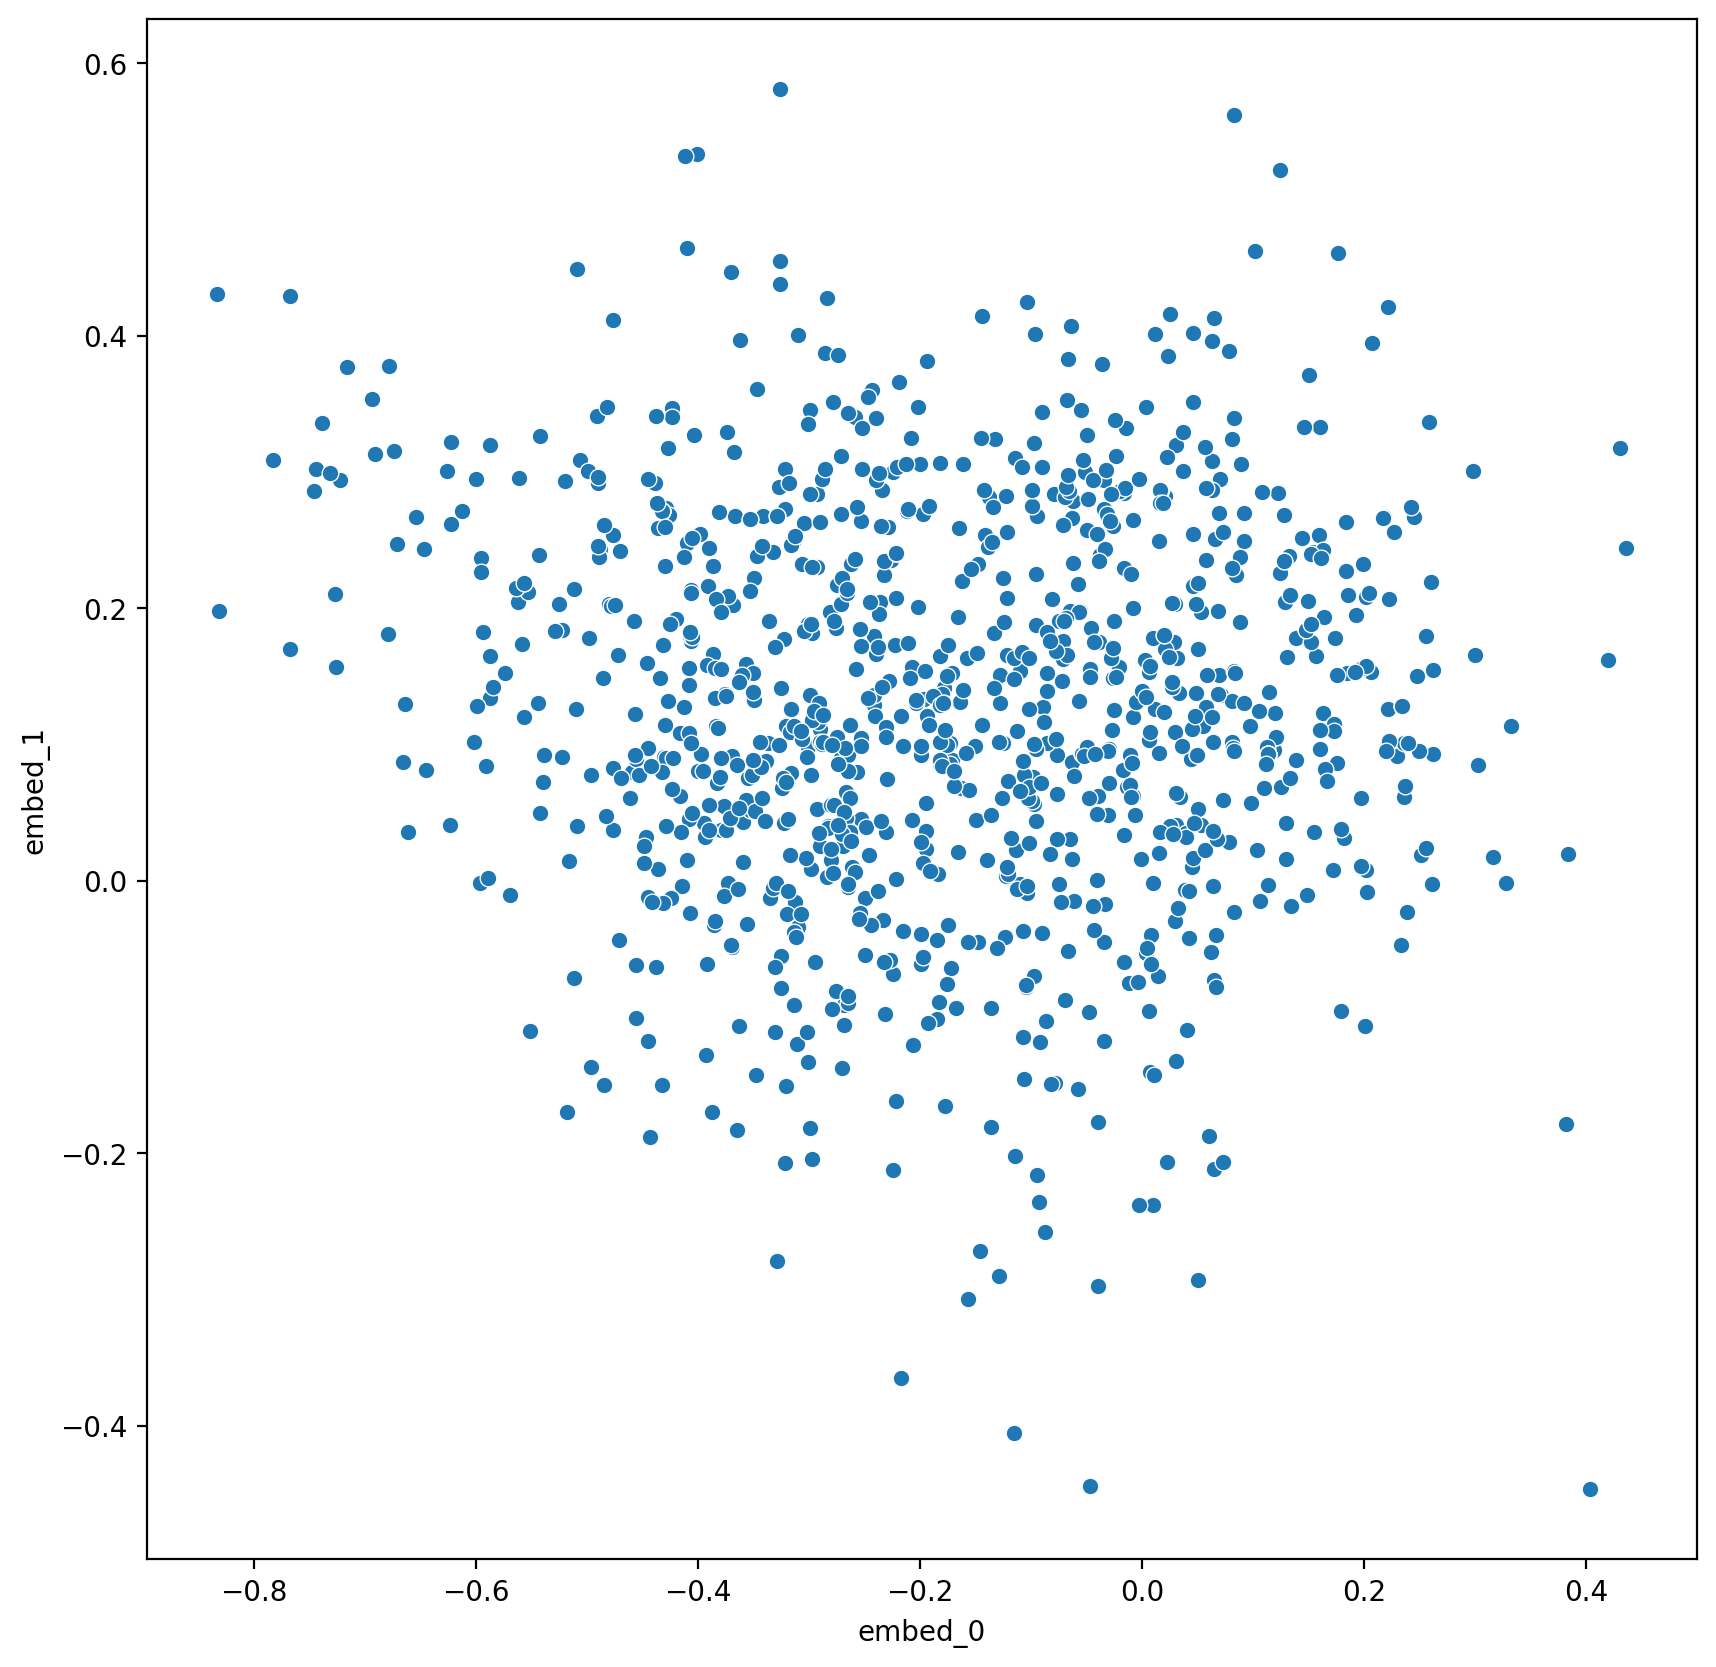

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=200)
sns.scatterplot(x='embed_0',y='embed_1',data=df)


<Axes: xlabel='embed_0', ylabel='Count'>

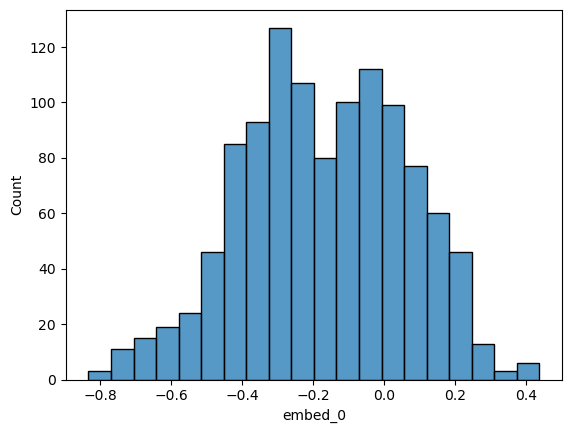

In [65]:
sns.histplot(df['embed_0'])

In [76]:
df['embed_0'].mean()
df['embed_1'].mean()

0.13016513112965425

In [67]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' containing embeddings and an 'output' column
# Split the DataFrame into two based on the output class
df_class_0 = df[df['output'] == 0]
df_class_1 = df[df['output'] == 1]

# Separate features (embeddings) and target (output) for each class
X_class_0 = df_class_0.iloc[:, :383]  # Assuming embeddings are in columns 0 to 382
y_class_0 = df_class_0['output']

X_class_1 = df_class_1.iloc[:, :383]  # Assuming embeddings are in columns 0 to 382
y_class_1 = df_class_1['output']

# Split each class into training and testing sets
X_train_class_0, X_test_class_0, y_train_class_0, y_test_class_0 = train_test_split(X_class_0, y_class_0, test_size=0.2, random_state=42)
X_train_class_1, X_test_class_1, y_train_class_1, y_test_class_1 = train_test_split(X_class_1, y_class_1, test_size=0.2, random_state=42)

# Combine training and testing sets for both classes
X_train = pd.concat([X_train_class_0, X_train_class_1])
X_test = pd.concat([X_test_class_0, X_test_class_1])
y_train = pd.concat([y_train_class_0, y_train_class_1])
y_test = pd.concat([y_test_class_0, y_test_class_1])

# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
# This code first splits the DataFrame into two based on the output class. Then it separates features (embeddings) and target (output) for each class. After that, it splits each



Training set shape: (39, 383) (39,)
Testing set shape: (10, 383) (10,)
